<a href="https://colab.research.google.com/github/hooroobaby/NCUECTech/blob/main/ECT_HW7_107403037.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 資料集 Churn_Modelling.csv 是一份銀行客戶的資料，請對此資料集進行前處理與分析各欄位，並預測潛在的流失客戶
# 1.

In [ ]:
import pandas as pd
df = pd.read_csv("Churn_Modelling.csv")

In [ ]:
df.isnull().sum()

CustomerId         0
CredRate           0
Geography          0
Gender             4
Age                6
Tenure             0
Balance            0
Prod Number        0
HasCrCard          0
ActMem             0
EstimatedSalary    4
Exited             0
dtype: int64

In [ ]:
df[df.isnull().values==True]

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
6,15592531,822,France,NaN,50.0,7,0.00,2,1,1,10062.80,0
10,15767821,528,France,Male,NaN,6,102016.72,2,0,0,80181.12,0
11,15737173,497,Spain,Male,NaN,3,0.00,2,1,0,76390.01,0
12,15632264,476,France,Female,NaN,10,0.00,2,1,0,26260.98,0
37,15729599,804,Spain,Male,NaN,7,76548.60,1,0,1,98453.45,0
38,15717426,850,France,Male,NaN,7,0.00,1,1,1,40812.90,0
39,15585768,582,Germany,Male,NaN,6,70349.48,2,0,1,178074.04,0
74,15770811,519,France,Male,36.0,9,0.00,2,0,1,NaN,0
77,15662085,678,France,Female,32.0,9,0.00,1,1,1,NaN,0
87,15625759,729,France,Male,30.0,9,0.00,2,1,0,NaN,0


In [ ]:
df.head()

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
0,15634602,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


# 2.

In [ ]:
df["Age"] = df["Age"].fillna(df.Age.mode()[0])

In [ ]:
df.EstimatedSalary = df.EstimatedSalary.fillna(df.EstimatedSalary.mean())

In [ ]:
df.Gender = df.Gender.fillna(df.Gender.mode()[0])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CredRate         10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  float64
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   Prod Number      10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   ActMem           10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 937.6+ KB


# 3.

In [ ]:
df = df.rename(columns={'CredRate':'CreditScore', 'ActMem':'IsActiveMember', 'Prod Number':'NumOfProducts', 'Exited':'Churn'})

# 4.

In [ ]:
df = df.drop(['CustomerId'], axis=1)

In [ ]:
df[['Geography','Gender','HasCrCard','Churn','IsActiveMember']] = df[['Geography','Gender','HasCrCard','Churn','IsActiveMember']].astype('category')

In [ ]:
df.dtypes

CreditScore           int64
Geography          category
Gender             category
Age                 float64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Churn              category
dtype: object

In [ ]:
df.to_csv('new.csv', index=False)

# 5.
### (1)0.2945沒有、0.7055有

In [ ]:
(df.groupby(['HasCrCard']).size())/10000

HasCrCard
0    0.2945
1    0.7055
dtype: float64

### (2)churn rate流失率=0.2037

In [ ]:
(df.groupby(['Churn']).size())/10000

Churn
0    0.7963
1    0.2037
dtype: float64


### (3)0.5151是活躍的

In [ ]:
(df.groupby(['IsActiveMember']).size())/10000

IsActiveMember
0    0.4849
1    0.5151
dtype: float64

### (4)

In [ ]:
result = df.groupby(["Churn"]).mean()
result

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
Churn,,,,,,
0,651.853196,37.411277,5.033279,72745.296779,1.544267,99718.932023
1,645.351497,44.837997,4.932744,91108.539337,1.475209,101465.677531


### (5)

In [ ]:
cor = df.corr()
cor

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
CreditScore,1.000000,-0.004179,0.000842,0.006268,0.012238,-0.001352
Age,-0.004179,1.000000,-0.009996,0.028141,-0.030590,-0.007215
Tenure,0.000842,-0.009996,1.000000,-0.012254,0.013444,0.007407
Balance,0.006268,0.028141,-0.012254,1.000000,-0.304180,0.013129
NumOfProducts,0.012238,-0.030590,0.013444,-0.304180,1.000000,0.014132
EstimatedSalary,-0.001352,-0.007215,0.007407,0.013129,0.014132,1.000000


<AxesSubplot:>

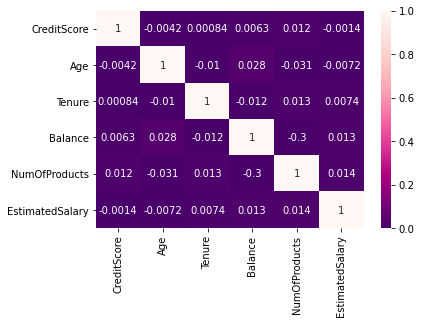

In [ ]:
import numpy as np
import seaborn as sns
sns.heatmap(cor, vmin=0, vmax=1, cmap="RdPu_r", annot=True)

# 6.
### (1)

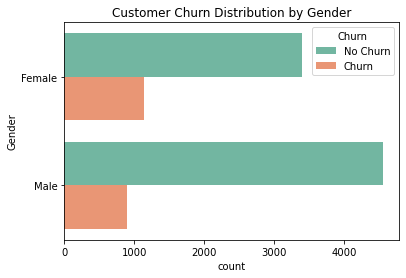

In [ ]:
ax = sns.countplot(y="Gender", hue="Churn", data=df, palette="Set2").set_title('Customer Churn Distribution by Gender')

import matplotlib.pyplot as plt
plt.legend(["No Churn", "Churn"], title="Churn")
plt.show()

### (2)

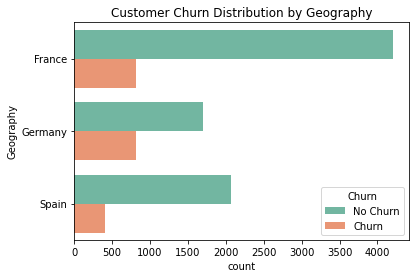

In [ ]:
ax = sns.countplot(y="Geography", hue="Churn", data=df, palette="Set2").set_title('Customer Churn Distribution by Geography')
plt.legend(["No Churn", "Churn"], title="Churn")
plt.show()

### (3)

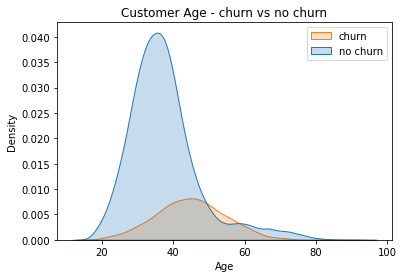

In [ ]:
# sns.kdeplot(x="Age", y="Churn", data=df, shade=True)
# sns.kdeplot(x="Age", Churn, data=df, shade=True)
sns.kdeplot(x="Age", hue="Churn", data=df, shade=True)

plt.title("Customer Age - churn vs no churn")
plt.legend(["churn",'no churn'])
plt.show()

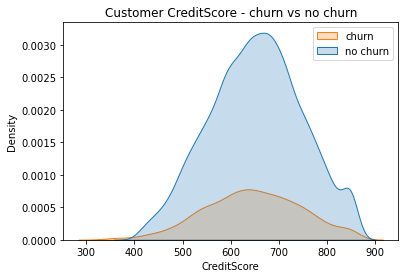

In [ ]:
sns.kdeplot(x="CreditScore", hue="Churn", data=df, shade=True)

plt.title("Customer CreditScore - churn vs no churn")
plt.legend(["churn",'no churn'])
plt.show()